In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([[40, 20],
                 [55, 30],
                 [70, 60],
                 [50, 35],
                 [45, 40],
                 [62, 75],
                 [45, 30],
                 [68, 80],
                 [80, 70],
                 [75, 90]])

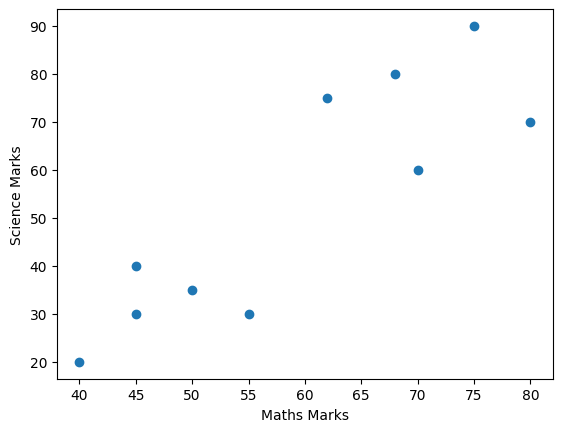

In [4]:
plt.scatter(data[:,0], data[:, 1])
plt.xlabel('Maths Marks')
plt.ylabel('Science Marks')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_data = scaler.fit_transform(data)
print(scaler_data)

[[-1.43299332 -1.39951173]
 [-0.3016828  -0.97541727]
 [ 0.82962771  0.29686613]
 [-0.67878631 -0.76337004]
 [-1.05588981 -0.5513228 ]
 [ 0.2262621   0.93300782]
 [-1.05588981 -0.97541727]
 [ 0.67878631  1.14505506]
 [ 1.58383472  0.72096059]
 [ 1.20673122  1.56914952]]


In [6]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=1)
pca.fit(scaler_data)

PCA(n_components=1)

In [15]:
pca.explained_variance_

array([2.07778406])

In [16]:
pca.explained_variance_ratio_

array([0.93500282])

In [17]:
pca_scaled_data = pca.transform(scaler_data)

In [18]:
scaler_data.shape

(10, 2)

In [19]:
pca_scaled_data.shape

(10, 1)

In [20]:
pca_scaled_data = pca.inverse_transform(pca_scaled_data)

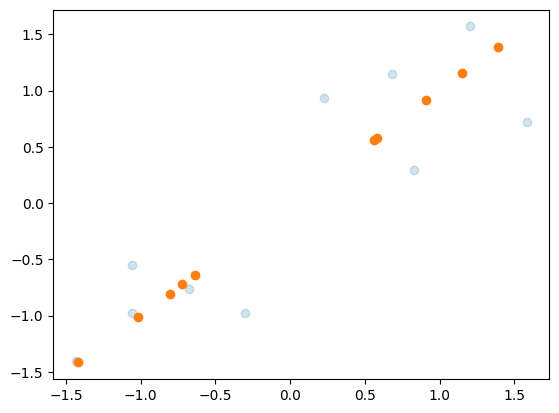

In [22]:
plt.scatter(scaler_data[:, 0], scaler_data[:, 1], alpha=0.2)
plt.scatter(pca_scaled_data[:, 0], pca_scaled_data[:, 1])

### PCA for visualization

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()

In [26]:
digits.data.shape

(1797, 64)

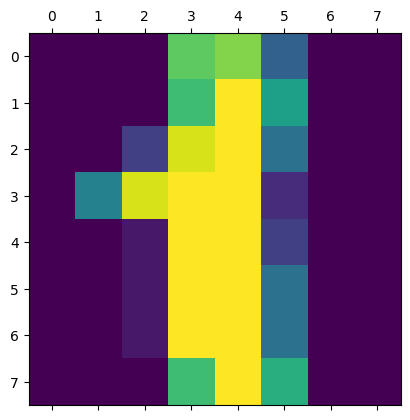

In [27]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[1])
plt.show()

In [28]:
digits.target[1]

1

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_digits = pca.fit_transform(digits.data)

In [33]:
new_digits.shape

(1797, 2)

In [34]:
digits.data.shape

(1797, 64)

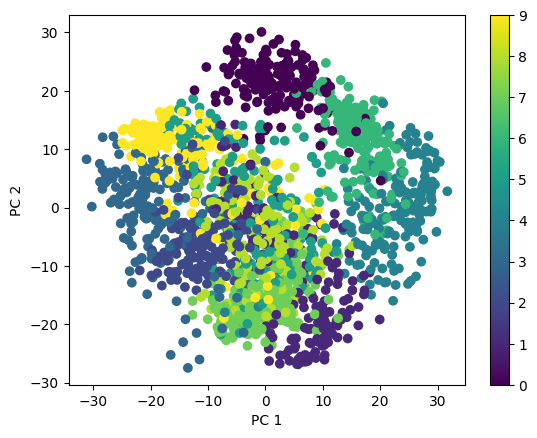

In [37]:
import matplotlib.pyplot as plt
plt.scatter(new_digits[:, 0], new_digits[:, 1], c=digits.target)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()
plt.show()

### PCA for speedup models

In [38]:
from sklearn.datasets import load_digits
import numpy as np

In [39]:
digits = load_digits()

In [41]:
digits.data.shape

(1797, 64)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data = sc.fit_transform(digits.data)

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_trian, y_test = train_test_split(new_data, digits.target, test_size=0.2, random_state=42)

In [57]:
x_train.shape

(1437, 64)

In [58]:
x_test.shape

(360, 64)

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="lbfgs", max_iter=1000)

import time
start = time.time()
model.fit(x_train, y_trian)
end = time.time()
print((end-start)*1000)

81.41469955444336


In [60]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9722222222222222

In [61]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
new_data_pca = pca.fit_transform(new_data)

In [62]:
new_data_pca.shape

(1797, 10)

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_trian, y_test = train_test_split(new_data_pca, digits.target, test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="lbfgs", max_iter=1000)

import time
start = time.time()
model.fit(x_train, y_trian)
end = time.time()
print((end-start)*1000)

95.71695327758789


In [65]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8944444444444445